In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential2
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": True,
	"inferring": True,
	"site": "PA",
	"training_date": "current", # values: earlier, current
	"mode": "evidential2", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_entropy", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	dates = [2019, 2020]
	datasetClass = PIMultipleDates
else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if config['mode'] == 'evidential2':
	patchesHandler = PatchesHandlerEvidential2()
if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': 
			exp = 6
			repetition_id = 0
			exp = 9

		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 7
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': exp = 1; repetition_id = 0		

else:

	exp = 13
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': True, 'inferring': True, 'site': 'PA', 'training_date': 'current', 'mode': 'evidential2', 'uncertainty_method': 'pred_entropy', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': False, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'inference_times': 1, 'training_times': 1}


ic| dataset.py:396 in __init__()- list(self.date_ids): [0]
ic| dataset.py:417 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 21
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [8]:
patchesHandler

In [9]:
manager.config

{'training': True,
 'inferring': True,
 'site': 'PA',
 'training_date': 'current',
 'mode': 'evidential2',
 'uncertainty_method': 'pred_entropy',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': False,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'inference_times': 1,
 'training_times': 1,
 'dropout_training': False}

In [10]:
exp

13

In [11]:
manager.setExperimentPath()
manager.createLogFolders()

In [12]:
# ic(type(dataset), exp, dataset.dates)


In [13]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


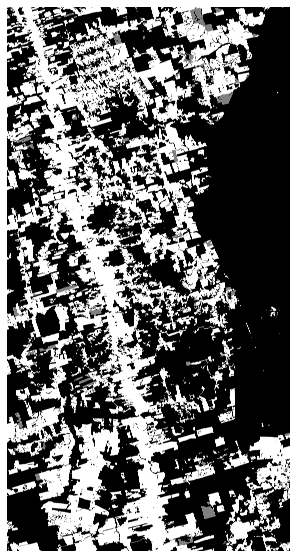

In [14]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [15]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [16]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [17]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([4077704,   24058, 4054038], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([4018062,  155579, 3982159], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([3765218,  334364, 4056218], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([6201069,  140180, 1814551], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([3907947,   93438, 4154415], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([4353664,   51100, 3751036], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([5004385,   64045, 3087370], dtype=int64))
Set 8 (array([0, 2], dtype=uint8), array([8148413,    7387], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([5158561,  138139, 2859100], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([3475926,   83519, 4596355], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([4668613,  107494, 3379693], dtype=int64))
Set 12 (array([0, 1, 2], dtype=uint8), array([7750580

In [18]:

manager.label_mask.dtype

dtype('uint8')

In [19]:

manager.getLabelCurrentDeforestation()

In [20]:

manager.loadInputImage()

ic| dataset.py:445 in loadInputImage()
    image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [21]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

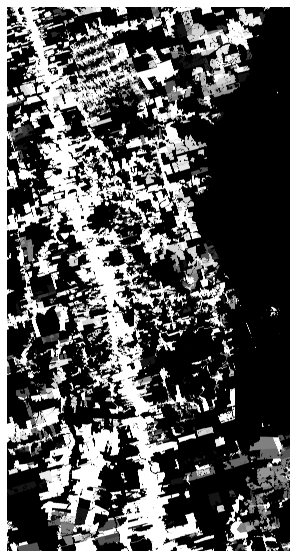

In [22]:

manager.logger.plotFigure(manager.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

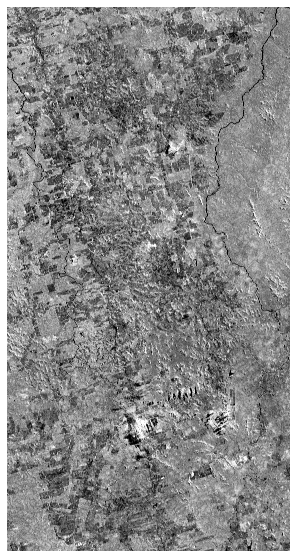

In [23]:

manager.logger.plotFigure(manager.image_stack[...,8], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [24]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([101787197,   1842912,  59485891], dtype=int64))

In [25]:
# manager.maskNoDataAsNotConsideredClass()

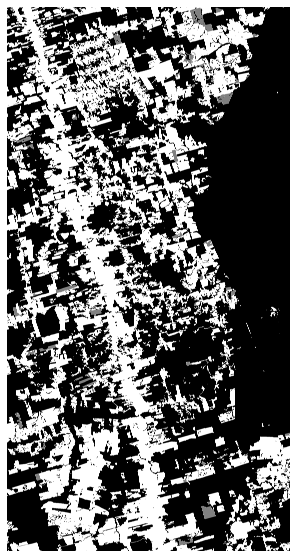

In [26]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [27]:

manager.getImageChannels()

ic| base.py:104 in getImageChannels()
    self.image_stack.shape: (17730, 9200, 21)
ic| base.py:106 in getImageChannels()- self.channels: 21


In [28]:

manager.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


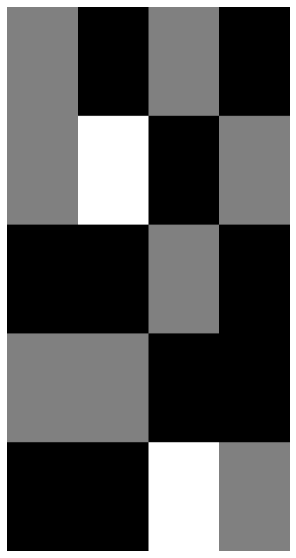

In [29]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [30]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [31]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([38533200,   804466, 25908734], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([9180568,  271248, 6859784], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([54073429,   767198, 26717373], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([101787197,   1842912,  59485891], dtype=int64))


In [32]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 3))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 3))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 3))

train unique percentage [0.591 0.012 0.397]
val unique [0.563 0.017 0.421]
test unique [0.663 0.009 0.328]


In [33]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


ic| patchesHandler.py:25 in create_idx_image()
    im_idx_row.shape: (17730, 9200, 1)
    im_idx_col.shape: (17730, 9200, 1)
ic| patchesHandler.py:26 in create_idx_image()
    im_idx_row.dtype: dtype('uint16')
    im_idx_col.dtype: dtype('uint16')
ic| patchesHandler.py:32 in create_idx_image()
    im_idx.shape: (17730, 9200, 2)
    im_idx.dtype: dtype('uint16')


In [34]:
if config["training"] == True:
    manager.extractCoords()

ic| patchesHandler.py:44 in extract_patches()
    coords.shape: (464, 239, 1, 128, 128, 2)
    coords.dtype: dtype('uint16')
ic| patchesHandler.py:48 in extract_patches()
    coords.shape: (110896, 2)
    coords.dtype: dtype('uint16')


In [35]:
if config["training"] == True:
    manager.trainTestSplit()

ic| base.py:122 in trainTestSplit()
    self.coords_train.shape: (41812, 3)
    self.coords_val.shape: (10260, 3)


In [36]:
if config["training"] == True:
    manager.label_mask.shape

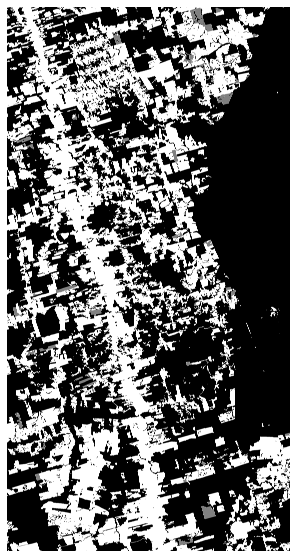

In [37]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [38]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [39]:
if config["training"] == True:
    print(manager.coords_train)

[[    0     0     0]
 [    0    38     0]
 [    0    76     0]
 ...
 [17594  8968     0]
 [17594  9006     0]
 [17594  9044     0]]


In [40]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

training samples:  (3756, 3) validation samples:  (1032, 3)


In [41]:
if config["training"] == True:
    inputSnipShow = True

In [42]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [43]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [45]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

In [46]:
manager.dataset.bands

10

ic| Logger.py:38 in snipDataset()
    np.

[2280 4750    0]
coord [2280 4750    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.29747355
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.3196338


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


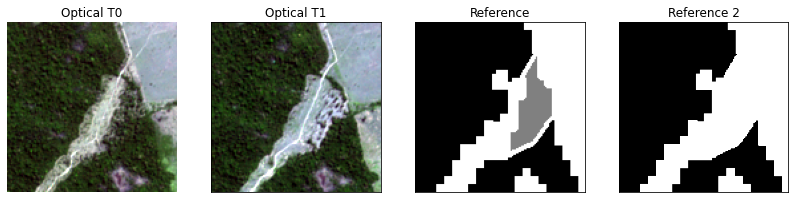

In [47]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.2714837
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.30292988
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 114 5928    0]
coord [ 114 5928    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


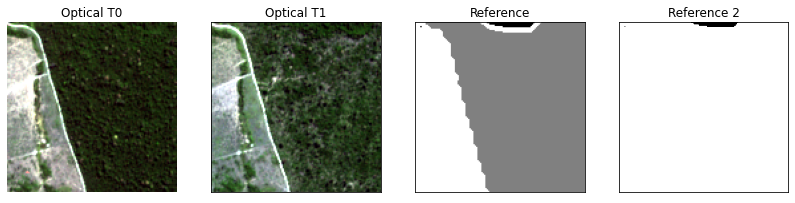

In [48]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.44512972
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.45241854


[ 874 1026    0]
coord [ 874 1026    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


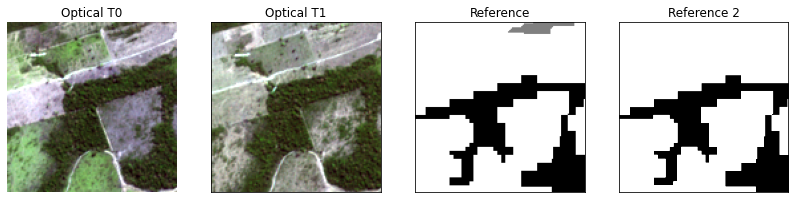

In [49]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


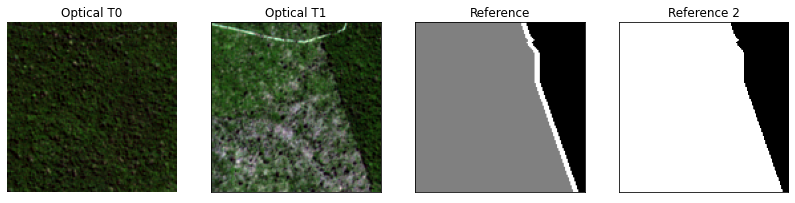

In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

ic| Logger.py:38 in snipDataset()
    np.mean(image_patch[...,dataset.previewBandsSnip[0]]): 0.09604081
    np.mean(image_patch[...,dataset.previewBandsSnip[1]]): 0.23388559


[ 608 6574    0]
coord [ 608 6574    0]
image_patch.shape (17730, 9200, 1)
reference_patch.shape (17730, 9200, 21)


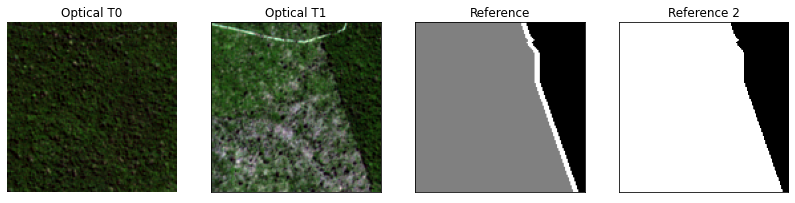

In [51]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [52]:
if config["training"] == True:
    manager.getGenerators()


In [53]:
if config["training"] == True:
    manager.fixChannelNumber()

In [54]:
if config["training"] == True:
    print(manager.path_exp)

D:/Jorge/datasets/deforestation/experiments/PA/exp13


In [55]:
if config["training"] == True:
    print(manager.channels)

21


In [56]:
if config["training"] == True:
    print(manager.image_stack.shape)

(17730, 9200, 21)


In [57]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

config['training_times'] 1


In [58]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

time:  0


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_enc_net (InputLayer)      [(None, 128, 128, 21 0                                            
__________________________________________________________________________________________________
res1_net1 (Conv2D)              (None, 128, 128, 16) 3040        input_enc_net[0][0]              
__________________________________________________________________________________________________
drop_net1 (SpatialDropout2D)    (None, 128, 128, 16) 0           res1_net1[0][0]                  
__________________________________________________________________________________________________
res2_net1 (Conv2D)              (None, 128, 128, 16) 2320        drop_net1[0][0]                  
______________________________________________________________________________________________

c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


New best val loss. Val loss: 0.63215. Early stop count: 0
Epoch: 2
Anneling Coeficient [0.1]
352/352 [==============================] - 32s 90ms/step - loss: 0.5927 - accuracy: 0.7739 - val_loss: 0.5510 - val_accuracy: 0.7595

Epoch 00001: val_loss improved from 0.63215 to 0.55105, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp13/models\resunet_0.h5
New best val loss. Val loss: 0.55105. Early stop count: 0
Epoch: 3
Anneling Coeficient [0.2]
352/352 [==============================] - 32s 90ms/step - loss: 0.5130 - accuracy: 0.7995 - val_loss: 0.4984 - val_accuracy: 0.7650

Epoch 00001: val_loss improved from 0.55105 to 0.49838, saving model to D:/Jorge/datasets/deforestation/experiments/PA/exp13/models\resunet_0.h5
New best val loss. Val loss: 0.49838. Early stop count: 0
Epoch: 4
Anneling Coeficient [0.3]
352/352 [==============================] - 31s 89ms/step - loss: 0.4807 - accuracy: 0.8320 - val_loss: 0.4746 - val_accuracy: 0.8562

Epoch 00001: val_loss improve

In [59]:
if config["training"] == True and config["mode"] != 'evidential2':
    manager.plotHistory()


In [60]:
repetition_id = 0

In [61]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [62]:
manager.image_stack.shape

(17730, 9200, 21)

In [63]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [64]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [65]:
manager.image_stack.shape

(17730, 9200, 21)

In [66]:
manager.setPadding()

-30.0 -16.0


In [67]:
from tensorflow.keras.models import Model, load_model, Sequential
import src.network as network
from src.evidential_learning import DirichletLayer
import src.evidential_learning as evidential

def infer(self):

    self.h, self.w, self.c = self.image1_pad.shape
    self.c = self.channels
    patch_size_rows = self.h//self.n_rows
    patch_size_cols = self.w//self.n_cols
    num_patches_x = int(self.h/patch_size_rows)
    num_patches_y = int(self.w/patch_size_cols)

    ic(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5')
    model = load_model(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5', 
        compile=False, custom_objects={"DirichletLayer": DirichletLayer })
    if self.classes_mode == False:
        class_n = 2
    else:
        class_n = 2
    
    if self.config["loadInference"] == False:
        if self.config["save_probabilities"] == False:
            if self.classes_mode == False:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], class_n), dtype = np.float32)
            else:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], class_n), dtype = np.float32)

            # self.prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)
        print("Dropout training mode: {}".format(self.config['dropout_training']))
        new_model = self.network_architecture(input_shape=(patch_size_rows,patch_size_cols, self.c), 
            nb_filters = self.nb_filters, n_classes = self.model_class_n, dropout_seed = None,
            training=self.config['dropout_training'], last_activation='relu') # , last_activation='relu'

        for l in range(1, len(model.layers)):
            new_model.layers[l].set_weights(model.layers[l].get_weights())
        
        self.patchesHandler.class_n = class_n

        with tf.device('/cpu:0'):
            tm = 0
            print('time: ', tm)


            # Recinstructing predicted map
            start_test = time.time()
            '''
            args_network = {'patch_size_rows': patch_size_rows,
                'patch_size_cols': patch_size_cols,
                'c': c,
                'nb_filters': nb_filters,
                'class_n': class_n,
                'dropout_seed': inference_times}
            '''
            self.alpha_reconstructed = self.patchesHandler.infer(
                    new_model, self.image1_pad, self.h, self.w, 
                    num_patches_x, num_patches_y, patch_size_rows, 
                    patch_size_cols, classes_mode = self.config['classes_mode'])
            prob_reconstructed, self.u_reconstructed = evidential.alpha_to_probability_and_uncertainty(
                self.alpha_reconstructed)
            # if self.classes_mode == False:
            #    prob_reconstructed = prob_reconstructed[:,:,:,0:2]
            ts_time =  time.time() - start_test

            if self.config["save_probabilities"] == True:
                np.save(self.path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
            else:
                self.prob_rec = prob_reconstructed
            

            del prob_reconstructed
    del self.image1_pad

In [68]:

import types
manager.infer = types.MethodType(infer, manager)


In [69]:
manager.infer()

ic| 3635147840.py:15 in infer()
    self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/PA/exp13/models/resunet_0.h5'


Dropout training mode: False


ValueError: Layer weight shape (1, 1, 32, 2) not compatible with provided weight shape (1, 1, 32, 3)

In [ ]:
manager.prob_rec.shape

(17760, 9216, 2)

In [ ]:
manager.loadPredictedProbabilities()

In [ ]:
manager.prob_rec.shape

(17760, 9216, 2)

In [ ]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [ ]:
manager.prob_rec.shape

(17760, 9216, 2)

In [ ]:
manager.getMeanProb()

In [ ]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:119 in getStats()
    np.min(value): 4.539375e-05
    np.mean(value): 0.40025106
    np.max(value): 0.9998638


In [ ]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (17760, 9216, 2)


(17760, 9216, 2)

In [ ]:
manager.unpadMeanProb()

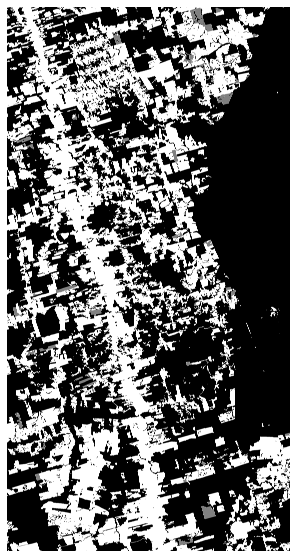

In [ ]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [ ]:
manager.squeezeLabel()

In [ ]:
manager.mean_prob.shape

(17730, 9200, 2)

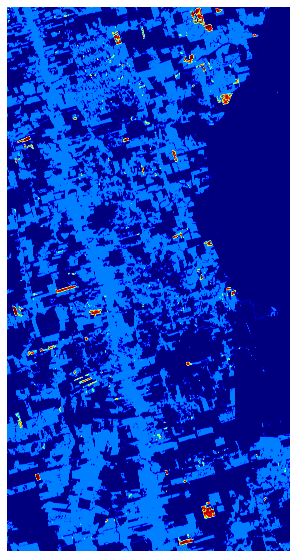

In [ ]:
manager.logger.plotFigure(manager.mean_prob[...,1], 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [ ]:
print(manager.label_mask.shape)

(17730, 9200)


In [ ]:
# manager.getLabelTest()

In [ ]:
# manager.getMAP()

In [ ]:
manager.prob_rec.shape

(17760, 9216, 2)

In [ ]:
# manager.preprocessProbRec()
# print(manager.prob_rec.shape)

In [ ]:
manager.prob_rec.shape

(17760, 9216, 2)

In [ ]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:119 in getStats()
    np.min(value): 4.539375e-05
    np.mean(value): 0.40025106
    np.max(value): 0.9998638


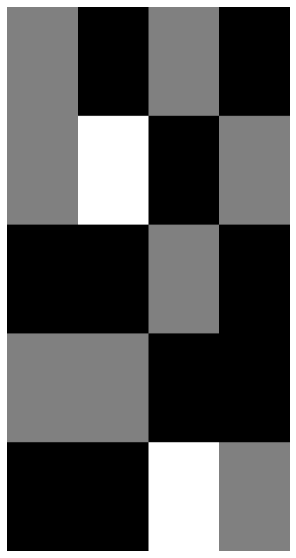

In [ ]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [ ]:
manager.getLabelCurrentDeforestation()

In [ ]:
manager.classes_mode

True

In [ ]:
manager.applyProbabilityThreshold()

(17730, 9200, 2)


In [ ]:
manager.setMeanProbNotConsideredAreas()


In [ ]:
manager.getTestValues()

ic| base.py:422 in getTestValues()- predicted_test.shape: (81558000,)
ic| base.py:431 in getTestValues()- predicted_test.shape: (54840627,)


In [ ]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0, 1], dtype=int8), array([161251139,   1864861], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0, 1], dtype=int8), array([161448389,   1667611], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0, 1], dtype=int8), array([162918750,    197250], dtype=int64))


In [ ]:
manager.calculateMetrics()

ic| base.py:475 in calculateMetrics()
    self.f1: 85.93
    self.precision: 91.18
    self.recall: 81.25


In [ ]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| multioutput.py:241 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (16311600,)
ic| multioutput.py:247 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (9430545,)
ic| base.py:486 in calculateMetricsValidation()
    f1_val: 84.75
    precision_val: 81.05
    recall_val: 88.81
    mAP_val: 83.28


In [ ]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [ ]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/PA/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:505 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| dataset.py:508 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:512 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/PA/deforestation_before_2008_PA.tif


ic| dataset.py:516 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| dataset.py:518 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| dataset.py:497 in loadLabel()
    label_per_date.shape: (17730, 9203, 1)


In [ ]:
manager.getErrorMask()

(array([0, 1], dtype=int16), array([162579965,    536035], dtype=int64))


In [ ]:
manager.getErrorMaskToShowRGB()

[0 1]


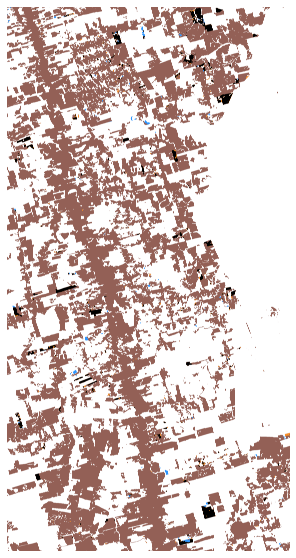

In [ ]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [ ]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [ ]:
manager.setUncertainty()

In [ ]:
manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [ ]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:119 in getStats()
    np.min(value): 9.07875e-05
    np.mean(value): 0.19950052
    np.max(value): 0.5


In [ ]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:119 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.017343888
    np.max(value): 0.5


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

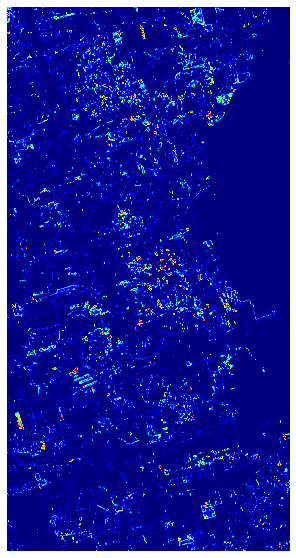

In [ ]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



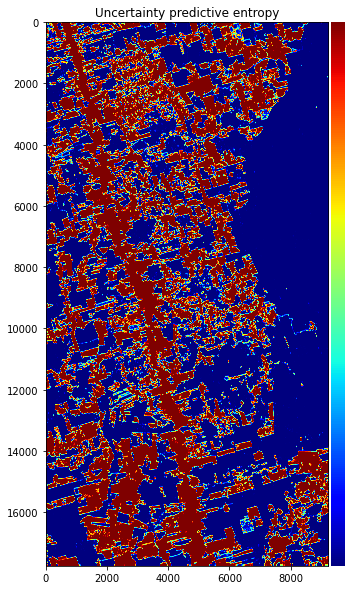

In [ ]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [ ]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:526 in getTestValues2()
    self.label_mask.shape: (17730, 9200)
ic| base.py:527 in getTestValues2()
    self.mask_amazon_ts.shape: (17730, 9200)
ic| base.py:531 in getTestValues2()
    self.label_mask_test.shape: (81558000,)
ic| base.py:539 in getTestValues2()
    self.error_mask_test.shape: (54741965,)


In [ ]:
# manager.logger.plotCropSample(manager)

In [ ]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [ ]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [ ]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

In [ ]:
# manager.logger.plotCropSampleT0T1(manager)

In [ ]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:119 in getStats()
    

np.min(value): 9.07875e-05
    np.mean(value): 0.023148265
    np.max(value): 0.5


In [ ]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [ ]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [ ]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [ ]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [ ]:
manager.config['uncertainty_method'] = 'evidential2'

In [ ]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "evidential2":
                self.threshold_list = list(np.linspace(np.min(self.uncertainty)+0.0000001, np.max(self.uncertainty)-0.005, 11))[1:]

    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [ ]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)


Get precision-recall threshold

In [ ]:

manager.getUncertaintyAAValues()

ic| 4112614954.py:65 in getUncertaintyAAValues()
    self.uncertainty.shape: (54741965,)
    self.label_mask_current_deforestation_test.shape: (54741965,)


[0.04958179875007636, 0.09907271000006787, 0.1485636212500594, 0.1980545325000509, 0.2475454437500424, 0.29703635500003395, 0.34652726625002545, 0.39601817750001694, 0.44550908875000844, 0.495]
threshold 0.04958179875007636


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4761648,)
    predicted_test_classified_incorrect.shape: (4761648,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4761648
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4761648
    len(label_mask_current_deforestation_test): 54741965


[0.99457359 0.9389973  0.2365863  0.08698351 0.88166583 0.76994263
 0.03836708]
threshold 0.09907271000006787


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3721616,)
    predicted_test_classified_incorrect.shape: (3721616,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3721616
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3721616
    len(label_mask_current_deforestation_test): 54741965


[0.99060826 0.94619362 0.36651657 0.0679847  0.85585774 0.728029
 0.04747645]
threshold 0.1485636212500594


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3067067,)
    predicted_test_classified_incorrect.shape: (3067067,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3067067
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3067067
    len(label_mask_current_deforestation_test): 54741965


[0.98453774 0.94689361 0.44919031 0.05602771 0.83550051 0.69127666
 0.05555707]
threshold 0.1980545325000509


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2546030,)
    predicted_test_classified_incorrect.shape: (2546030,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2546030
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2546030
    len(label_mask_current_deforestation_test): 54741965


[0.97855756 0.94642277 0.51948825 0.04650966 0.81344017 0.64962662
 0.06422313]
threshold 0.2475454437500424


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2103695,)
    predicted_test_classified_incorrect.shape: (2103695,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2103695
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2103695
    len(label_mask_current_deforestation_test): 54741965


[0.97303806 0.9455267  0.5803937  0.03842929 0.78785022 0.60114453
 0.07430996]
threshold 0.29703635500003395


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1722355,)
    predicted_test_classified_incorrect.shape: (1722355,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1722355
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1722355
    len(label_mask_current_deforestation_test): 54741965


[0.96535342 0.94403814 0.63414654 0.03146316 0.76162378 0.54343976
 0.08551247]
threshold 0.34652726625002545


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1404112,)
    predicted_test_classified_incorrect.shape: (1404112,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1404112
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1404112
    len(label_mask_current_deforestation_test): 54741965


[0.95591026 0.94248056 0.68097008 0.02564965 0.73603346 0.47416564
 0.09728127]
threshold 0.39601817750001694


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1137762,)
    predicted_test_classified_incorrect.shape: (1137762,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1137762
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1137762
    len(label_mask_current_deforestation_test): 54741965


[0.94552132 0.94055475 0.72217283 0.02078409 0.70958878 0.38919188
 0.10926228]
threshold 0.44550908875000844


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (900030,)
    predicted_test_classified_incorrect.shape: (900030,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 900030
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 900030
    len(label_mask_current_deforestation_test): 54741965


[0.93371174 0.93726891 0.76109349 0.01644132 0.67686051 0.27368413
 0.12107163]
threshold 0.495


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (645157,)
    predicted_test_classified_incorrect.shape: (645157,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 645157
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 645157
    len(label_mask_current_deforestation_test): 54741965


[0.91452143 0.92989203 0.80660442 0.01178542 0.64952296 0.04474638
 0.12797442]


In [ ]:
manager.threshold_list

[0.04958179875007636,
 0.09907271000006787,
 0.1485636212500594,
 0.1980545325000509,
 0.2475454437500424,
 0.29703635500003395,
 0.34652726625002545,
 0.39601817750001694,
 0.44550908875000844,
 0.495]

In [ ]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:668 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (54741965,)
    self.label_mask_current_deforestation_test.shape: (54741965,)


threshold 0.04958179875007636
(54741965,) (54741965,)
cm_audited [[54006600      948]
 [   11288   723129]]
[0.99869075 0.98462999]
threshold 0.09907271000006787
(54741965,) (54741965,)
cm_audited [[54004996     2552]
 [   15307   719110]]
[0.99646372 0.97915762]
threshold 0.1485636212500594
(54741965,) (54741965,)
cm_audited [[54002367     5181]
 [   18502   715915]]
[0.9928151  0.97480723]
threshold 0.1980545325000509
(54741965,) (54741965,)
cm_audited [[53999188     8360]
 [   21598   712819]]
[0.98840787 0.97059164]
threshold 0.2475454437500424
(54741965,) (54741965,)
cm_audited [[53995737    11811]
 [   24557   709860]]
[0.98363382 0.96656259]
threshold 0.29703635500003395
(54741965,) (54741965,)
cm_audited [[53990833    16715]
 [   27608   706809]]
[0.97689779 0.96240828]
threshold 0.34652726625002545
(54741965,) (54741965,)
cm_audited [[53984481    23067]
 [   30522   703895]]
[0.96826932 0.9584405 ]
threshold 0.39601817750001694
(54741965,) (54741965,)
cm_audited [[53976989    

ic| base.py:674 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.99869075, 0.98462999],
                                  [0.99646372, 0.97915762],
                                  [0.9928151 , 0.97480723],
                                  [0.98840787, 0.97059164],
                                  [0.98363382, 0.96656259],
                                  [0.97689779, 0.96240828],
                                  [0.96826932, 0.9584405 ],
                                  [0.95822163, 0.95435699],
                                  [0.94613331, 0.94906028],
                                  [0.92569156, 0.93918714]])


cm_audited [[53952179    55369]
 [   44662   689755]]
[0.92569156 0.93918714]


In [ ]:
manager.setPlotLimsForUncertaintyAA()

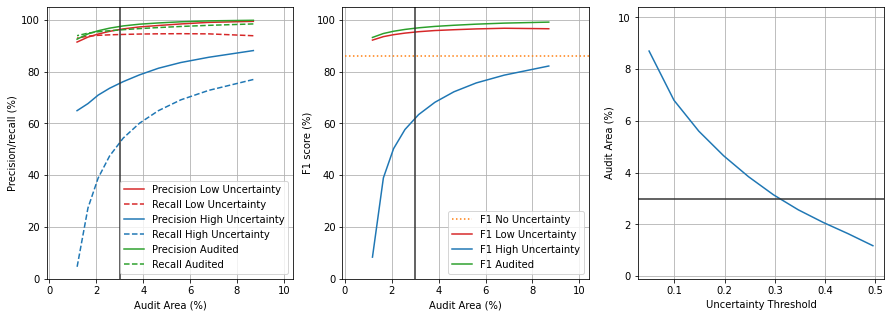

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [ ]:
from scipy import optimize  

def getOptimalUncertaintyThreshold(self, AA = 0.03, bounds = None):

    def getAAFromUncertaintyThreshold(threshold): 
        print(threshold)
        metrics_values2 = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, [threshold])
        return np.abs(AA - metrics_values2[:,3].squeeze())
    if bounds is None:
        bounds = (np.min(self.uncertainty) + 0.0015, np.max(self.uncertainty)-0.0015)
    
    ic(bounds)
    minimum = optimize.minimize_scalar(getAAFromUncertaintyThreshold, 
        method='bounded', bounds=bounds, tol=0.0001)
    self.threshold_optimal = minimum.x
    ic(self.threshold_optimal)

In [ ]:

import types

manager.getOptimalUncertaintyThreshold = types.MethodType(getOptimalUncertaintyThreshold, manager)


In [ ]:
manager.getOptimalUncertaintyThreshold(bounds = (np.min(manager.uncertainty)+0.0000001, 0.353))

ic| 2231348037.py:14 in getOptimalUncertaintyThreshold()
    bounds: (9.088750008484349e-05, 0.353)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.13489017353549204
threshold 0.13489017353549204


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3230753,)
    predicted_test_classified_incorrect.shape: (3230753,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3230753
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3230753
    len(label_mask_current_deforestation_test): 54741965


[0.98629565 0.94675374 0.42794625 0.05901785 0.84111816 0.70182631
 0.05329354]
0.21820071396459276
threshold 0.21820071396459276


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2358209,)
    predicted_test_classified_incorrect.shape: (2358209,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2358209
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2358209
    len(label_mask_current_deforestation_test): 54741965


[0.97638949 0.94609071 0.54523656 0.04307863 0.80340663 0.63087904
 0.06813711]
0.26968945957089924
threshold 0.26968945957089924


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1925695,)
    predicted_test_classified_incorrect.shape: (1925695,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1925695
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1925695
    len(label_mask_current_deforestation_test): 54741965


[0.96989696 0.94493681 0.60510582 0.03517767 0.77618868 0.57678488
 0.07922472]
0.3015112543936935
threshold 0.3015112543936935


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1690992,)
    predicted_test_classified_incorrect.shape: (1690992,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1690992
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1690992
    len(label_mask_current_deforestation_test): 54741965


[0.96456683 0.94389456 0.63872704 0.03089023 0.75919637 0.53760076
 0.08656206]
0.32117820517720574
threshold 0.32117820517720574


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1559013,)
    predicted_test_classified_incorrect.shape: (1559013,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1559013
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1559013
    len(label_mask_current_deforestation_test): 54741965


[0.96098464 0.9432233  0.65791642 0.0284793  0.74875873 0.51117503
 0.09124378]
0.3063966528837347
threshold 0.3063966528837347


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1657095,)
    predicted_test_classified_incorrect.shape: (1657095,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1657095
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1657095
    len(label_mask_current_deforestation_test): 54741965


[0.96374956 0.9437729  0.64370787 0.03027102 0.75637014 0.53100616
 0.08775415]
0.3098527949193024
threshold 0.3098527949193024


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1633794,)
    predicted_test_classified_incorrect.shape: (1633794,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1633794
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1633794
    len(label_mask_current_deforestation_test): 54741965


[0.96312344 0.9435705  0.64709014 0.02984537 0.75455658 0.52654683
 0.08853727]
0.30963373856932996
threshold 0.30963373856932996


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1635268,)
    predicted_test_classified_incorrect.shape: (1635268,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1635268
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1635268
    len(label_mask_current_deforestation_test): 54741965


[0.96319304 0.94357438 0.64686411 0.02987229 0.75461272 0.52685979
 0.08849462]
0.3084727813170101
threshold 0.3084727813170101


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1643127,)
    predicted_test_classified_incorrect.shape: (1643127,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1643127
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1643127
    len(label_mask_current_deforestation_test): 54741965


[0.96337223 0.94367464 0.64578026 0.03001586 0.75524954 0.52825477
 0.08822664]
0.30767977082050896
threshold 0.30767977082050896


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1648441,)
    predicted_test_classified_incorrect.shape: (1648441,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1648441
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1648441
    len(label_mask_current_deforestation_test): 54741965


[0.96349917 0.94370978 0.64502047 0.03011293 0.75568946 0.52926904
 0.0880386 ]
0.30862298032286234
threshold 0.30862298032286234


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1642123,)
    predicted_test_classified_incorrect.shape: (1642123,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642123
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642123
    len(label_mask_current_deforestation_test): 54741965


[0.96335213 0.94365183 0.6459137  0.02999752 0.75516677 0.52809629
 0.08825848]
0.3090090556186037
threshold 0.3090090556186037


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1639462,)
    predicted_test_classified_incorrect.shape: (1639462,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1639462
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1639462
    len(label_mask_current_deforestation_test): 54741965


[0.96327566 0.94362092 0.64626772 0.02994891 0.75500198 0.52763915
 0.0883455 ]
0.3086589536784396
threshold 0.3086589536784396


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1641892,)
    predicted_test_classified_incorrect.shape: (1641892,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1641892
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1641892
    len(label_mask_current_deforestation_test): 54741965


[0.96334601 0.9436469  0.64594501 0.0299933  0.75515066 0.52805856
 0.0882654 ]
0.3085880486630402
threshold 0.3085880486630402


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1642345,)
    predicted_test_classified_incorrect.shape: (1642345,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642345
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642345
    len(label_mask_current_deforestation_test): 54741965


[0.96335651 0.94365522 0.64588647 0.03000157 0.75518301 0.52813018
 0.08825074]
0.30855471075260643
threshold 0.30855471075260643


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1642573,)
    predicted_test_classified_incorrect.shape: (1642573,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642573
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642573
    len(label_mask_current_deforestation_test): 54741965
ic| 2231348037.py:18 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.3085880486630402


[0.9633569  0.94366413 0.64585787 0.03000574 0.75521007 0.52815926
 0.08824334]


In [ ]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.3085880486630402
threshold 0.3085880486630402


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1642345,)
    predicted_test_classified_incorrect.shape: (1642345,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642345
    len(label_mask_current_deforestation_test): 54741965
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1642345
    len(label_mask_current_deforestation_test): 54741965


[0.96335651 0.94365522 0.64588647 0.03000157 0.75518301 0.52813018
 0.08825074]
threshold 0.3085880486630402
(54741965,) (54741965,)


ic| base.py:811 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.03000157]),
                     'UEO': array([0.08825074]),
                     'f1': 85.93,
                     'f1_H': array([0.6215707]),
                     'f1_L': array([0.9534041]),
                     'precision_H': array([0.75518301]),
                     'precision_L': array([0.96335651]),
                     'recall_H': array([0.52813018]),
                     'recall_L': array([0.94365522]),
                     'recall_Ltotal': array([0.64588647])}
ic| base.py:812 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.96821098]),
                             'precision': array([0.97508344]),
                             'recall': array([0.96143472])}


cm_audited [[53989505    18043]
 [   28323   706094]]
[0.97508344 0.96143472]


{'metrics': {'precision_L': array([0.96335651]),
  'recall_L': array([0.94365522]),
  'recall_Ltotal': array([0.64588647]),
  'AA': array([0.03000157]),
  'precision_H': array([0.75518301]),
  'recall_H': array([0.52813018]),
  'UEO': array([0.08825074]),
  'f1_L': array([0.9534041]),
  'f1_H': array([0.6215707]),
  'f1': 85.93},
 'metrics_audited': {'precision': array([0.97508344]),
  'recall': array([0.96143472]),
  'f1': array([0.96821098])},
 'exp': 12}

In [ ]:
print("A")

A
